In [1]:
# 导入一些包
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs

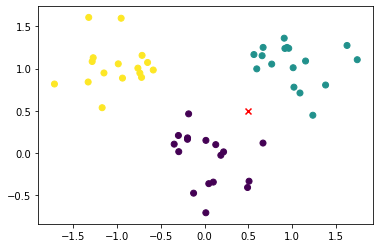

In [2]:
# 模拟出一些数据集出来

#r = np.random.randint(1,100)
r = 4
#print(r)
k = 3
x , y = make_blobs(n_samples = 50,
                   cluster_std = [0.3, 0.3, 0.3],
                   centers = [[0,0],[1,1],[-1,1]]
                   ,random_state = r
                  )
sim_data = pd.DataFrame(x, columns = ['x', 'y'])
sim_data['label'] = y
sim_data.head(5)

datasets = sim_data.copy()

# 设置测试点

p = [0.5, 0.5]

plt.scatter(sim_data['x'], sim_data['y'], c = y)
plt.scatter(0.5, 0.5, c = 'red', marker = 'x')

In [3]:
# 计算每一个点到距离


In [4]:
# 把计算出来的距离与标签拼接起来



In [5]:
# 确认前k个点


In [6]:
# 开始投票



In [7]:
# 封装成一个函数



In [8]:
# 测试


In [9]:
# 尝试其它的数据集

rowdata={'电影名称':['无问西东','后来的我们','前任3','红海行动','唐人街探案','战狼2'],
         '打斗镜头':[1,5,12,108,112,115],
         '接吻镜头':[101,89,97,5,9,8],
         '电影类型':['爱情片','爱情片','爱情片','动作片','动作片','动作片']} 

movie_data=pd.DataFrame(rowdata)
movie_data

,电影名称,打斗镜头,接吻镜头,电影类型
0,无问西东,1,101,爱情片
1,后来的我们,5,89,爱情片
2,前任3,12,97,爱情片
3,红海行动,108,5,动作片
4,唐人街探案,112,9,动作片
5,战狼2,115,8,动作片


In [10]:
# datasets = movie_data.iloc[:, 1:]
# knn_classify([24,67], datasets, 5)

In [11]:
# sklearn 实现

X , y = make_blobs(n_samples = 50,
                   cluster_std = [0.3, 0.3, 0.3],
                   centers = [[0,0],[1,1],[-1,1]]
                   ,random_state = r
                  )

from sklearn.neighbors import KNeighborsClassifier


In [12]:
# breast_cancer 数据集

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 探索数据集
# data = load_breast_cancer()
# data

In [13]:
name = ['平均半径','平均纹理','平均周长','平均面积',
        '平均光滑度','平均紧凑度','平均凹度',
        '平均凹点','平均对称','平均分形维数',
        '半径误差','纹理误差','周长误差','面积误差',
        '平滑度误差','紧凑度误差','凹度误差',
        '凹点误差','对称误差',
        '分形维数误差','最差半径','最差纹理',
        '最差的边界','最差的区域','最差的平滑度',
        '最差的紧凑性','最差的凹陷','最差的凹点',
        '最差的对称性','最差的分形维数']

In [14]:
# 划分训练集和测试集


In [15]:
# 建立模型&评估模型


In [16]:
# 选取最优的K值

# 更换不同的n_neighbors参数的取值，观察结果的变化


In [17]:
# 绘制学习曲线

import matplotlib.pyplot as plt

score = []
krange = range(1,20)

In [18]:
# 交叉验证

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

score = []
krange = range(1,20)

In [19]:
from sklearn.model_selection import cross_val_score as CVS


In [20]:
# 均值：查看模型的平均效果


In [21]:
# 方差：查看模型是否稳定


12
0.9332401800962584


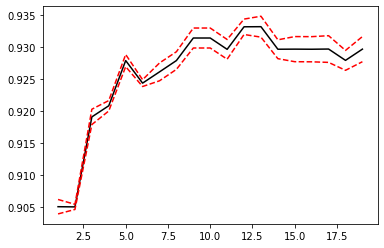

In [24]:
# 绘制带交叉验证的学习曲线
score = []
var_ = []
krange=range(1,20)

for i in krange:
    clf = KNeighborsClassifier(n_neighbors=i)
    cvresult = CVS(clf,x,y,cv=5)
    score.append(cvresult.mean())
    var_.append(cvresult.var())
    
plt.plot(krange,score,color='k')
plt.plot(krange,np.array(score)+np.array(var_)*2,c='red',linestyle='--')
plt.plot(krange,np.array(score)-np.array(var_)*2,c='red',linestyle='--')

bestindex = krange[score.index(max(score))]-1
print(bestindex)
print(score[bestindex])

In [22]:
# 归一化

from sklearn.preprocessing import MinMaxScaler 

data = [[-1,2],[-0.5,6],[0,10],[1,18]]

# 如果换成表是什么样子？
pd.DataFrame(data)

,0,1
0,-1.0,2
1,-0.5,6
2,0.0,10
3,1.0,18


In [23]:
# 实现归一化


In [24]:
# 训练和导出结果一步达成


In [25]:
# 也可以直接通过numpy来实现


5
0.9724367088607595


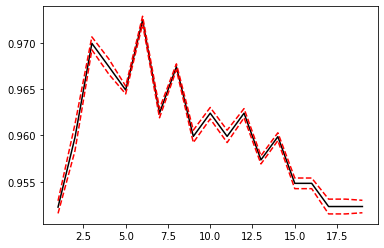

In [31]:
from sklearn.preprocessing import MinMaxScaler as mms
data = load_breast_cancer()
x = data.data
y = data.target
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

MMS = mms().fit(x_train)

x_test_ = MMS.transform(x_test)
x_train_ = MMS.transform(x_train)

score = []
var_ = []
krange = range(1,20)

# 严谨地使用了验证集
for i in krange:
    clf = KNeighborsClassifier(n_neighbors=i)
    cvresult = CVS(clf,x_train_,y_train,cv=5)
    score.append(cvresult.mean())
    var_.append(cvresult.var())
plt.plot(krange,score,color = 'k')
plt.plot(krange,np.array(score)+np.array(var_)*2,c='red',linestyle='--')
plt.plot(krange,np.array(score)-np.array(var_)*2,c='red',linestyle='--')
bestindex = krange[score.index(max(score))]-1
print(bestindex)
print(score[bestindex])

In [32]:
# 测试模型结果
clf = KNeighborsClassifier(n_neighbors=8).fit(x_train_,y_train)
score = clf.score(x_test_,y_test)
score

0.9707602339181286

2
0.9699367088607594


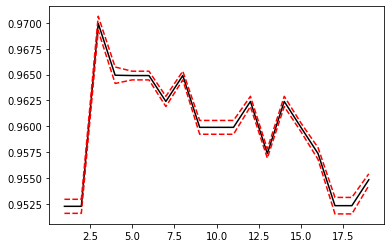

In [33]:
# 加上参数weights

score = []
var_ = []
krange = range(1,20)

for i in krange:
    clf = KNeighborsClassifier(n_neighbors=i,weights='distance')
    cvresult = CVS(clf,x_train_,y_train,cv=5)
    score.append(cvresult.mean())
    var_.append(cvresult.var())

plt.plot(krange,score,color='k')
plt.plot(krange,np.array(score)+np.array(var_)*2,c='red',linestyle='--')
plt.plot(krange,np.array(score)-np.array(var_)*2,c='red',linestyle='--')
bestindex = krange[score.index(max(score))]-1
print(bestindex)
print(score[bestindex])

In [34]:
# 测试模型效果
clf = KNeighborsClassifier(n_neighbors=8,weights='distance').fit(x_train_,y_train)
score =clf.score(x_test_,y_test)
score

0.9649122807017544